In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
def read_data(eis_file):
    EIS_list = []

    # eis in EIS_list:
    """
    eis = {
        cycle: int,
        size: int,
        freq: [],
        Re: [],
        Im: [],
    }
    """
    
    with pd.ExcelFile(eis_file) as df_eis:
        for sheet_name in df_eis.sheet_names:
            df = pd.read_excel(df_eis, sheet_name)
            cycle = int(sheet_name)
            freq = df['         freq/Hz '].values
            Re = df['Re(Z)/Ohm'].values
            Im = df['-Im(Z)/Ohm'].values
            size = len(freq)
            eis = {
                'cycle': cycle,
                'size': size,
                'freq': freq,
                'Re': Re,
                'Im': Im,
            }
            EIS_list.append(eis)

    
    return EIS_list

In [8]:
PANA_2_5 = read_data('./PANA 2.5/PANA 2.5.xlsx')

In [10]:
print(len(PANA_2_5))

46


选择绘图的 style

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# for style in plt.style.available:
#     print(style)

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

选择配色方案（sns的color_palette）

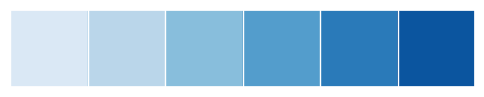

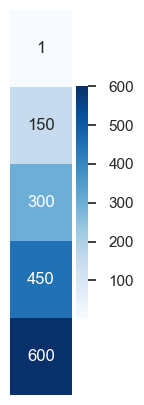

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PALETTE = "Blues"
sns.palplot(sns.color_palette(PALETTE))
matrix = np.linspace(1, 600, 5).reshape(5, 1).astype(int)
fig = plt.figure(figsize=(1, 5))
sns_plot = sns.heatmap(
    matrix,
    annot=True,
    cmap=PALETTE,
    cbar=True,
    fmt=".0f",
    xticklabels=False,
    yticklabels=False,
)
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_eis_data(EIS_list):
    palette = sns.color_palette(PALETTE, n_colors=len(EIS_list))
    
    # 创建一个图和轴
    plt.figure(figsize=(10, 6))  # 稍微增加图的宽度以容纳图例
    
    # 遍历EIS数据列表
    for idx, eis in enumerate(EIS_list):
        # if eis['cycle'] < 250:
        #     continue
        # 绘制Nyquist图，实部Re作为X轴，虚部Im作为Y轴
        plt.scatter(eis['Re'], eis['Im'], color=palette[idx], label=f'Cycle {eis["cycle"]}', s=8)
        plt.plot(eis['Re'], eis['Im'], color=palette[idx])
        

    # 添加图例、标题和轴标签
    plt.legend(title="EIS Cycle", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7, title_fontsize='large')
    plt.title("Nyquist Plot of EIS Data")
    plt.xlabel("Real Part (Re)")
    plt.ylabel("Imaginary Part (Im)")
    
    plt.ylim(-0.01, 0.005)

    # 适当调整子图参数，使图例不会被切割
    plt.subplots_adjust(right=0.75)

    # 显示图形
    plt.show()

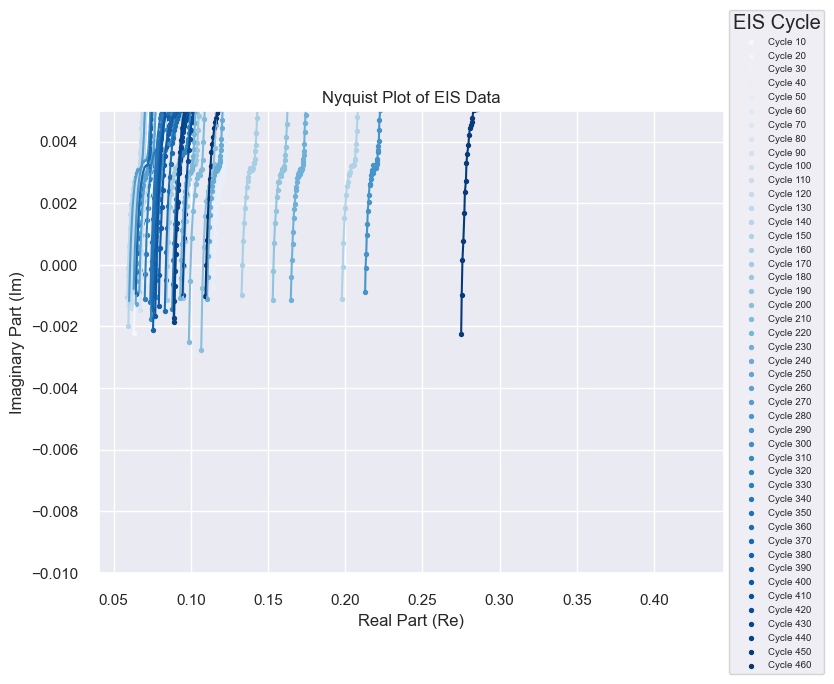

In [22]:
plot_eis_data(PANA_2_5)